## Visualization and Interactivity in Python

- Now that we're a little acquainted in how to manipulate data with python, let's see how we can actually visualize it
- There are many libraries that visualize data 
- The nice thing about Python, is that visualization is pretty one-button to get something out that looks *okay*
    - but you have infinite flexibility to make it your own
- You can also get interactivity pretty easily, without too much trouble
    -  Interactivity is great when you want to explore data more easily or give your collaborators an easy way to explore the data without having them go deep into code
        So, basically very good for RA work...

## The Art of Visualization

- Visualization of data is as much an art as it is a science
- You have to be able to show the most information in a digestible way, that highlights your story
    - Without being misleading!
- We'll be talking about the methods and different libraries that might be useful to you, but this is really the tip of the iceberg
- Plotting in python is not difficult, but different libraries have different approaches
- We'll be looking at `matplotlib`, `seaborn` and `plotly`
    - `matplotlib` is the basis of most visualization in python
        - is based on an OOP implementation of visualization
    - `seaborn` builds on `matplotlib` and creates many ways to create useful plots fast
        - regression plots, heatmaps etc...
    - `plotly` is an easy way to make your visualization interactive or even animated
- These are great starts to get the hang of visualizing data and even creating interactive visualizations

## Scatterplots and Line plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from ipywidgets import interact, interact_manual, fixed
from ydata_profiling import ProfileReport


/Users/lordflaron/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/lordflaron/opt/anaconda3/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [5]:
rng = np.random.default_rng(seed=1)

x = np.arange(-3.14,3.14, .1)
y = np.sin(x)

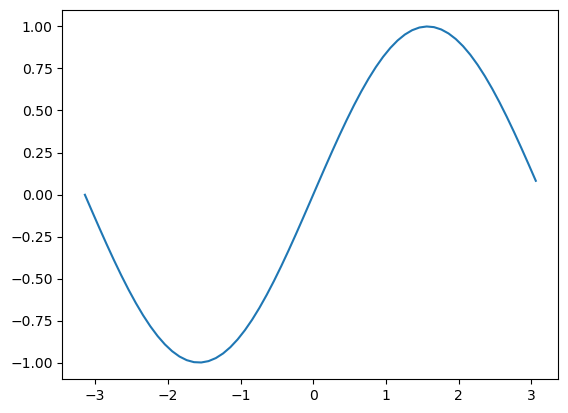

In [6]:
fig, ax = plt.subplots()

ax.plot(x,y)

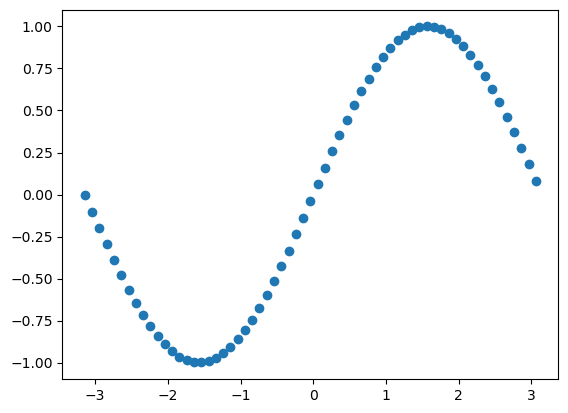

In [7]:
fig, ax = plt.subplots()

ax.scatter(x,y)

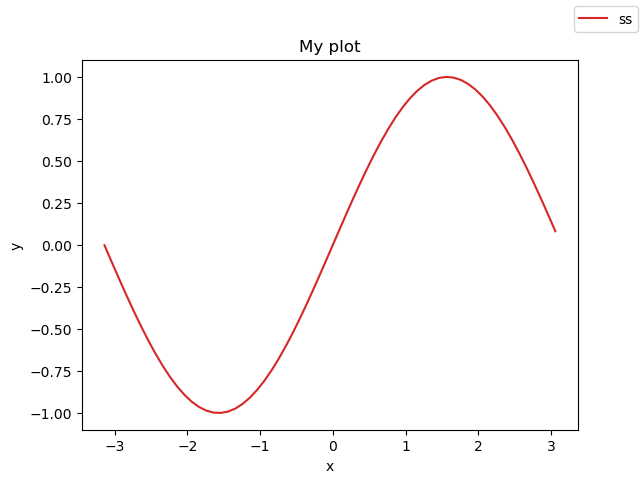

In [12]:
fig, ax = plt.subplots()

ax.plot(x,y, color='tab:red')

# default named colors
# https://matplotlib.org/stable/gallery/color/named_colors.html

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("My plot")

fig.legend(['ss'])


Text(0.5, 1.0, 'My plot')

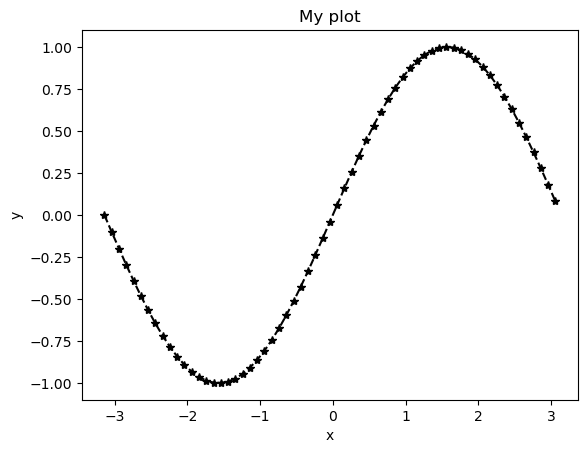

In [14]:
fig, ax = plt.subplots()

ax.plot(x,y, color='black', marker='*', linestyle='--'
        )

# default named colors
# https://matplotlib.org/stable/gallery/color/named_colors.html

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("My plot")


Text(1, 0.2, 'my text')

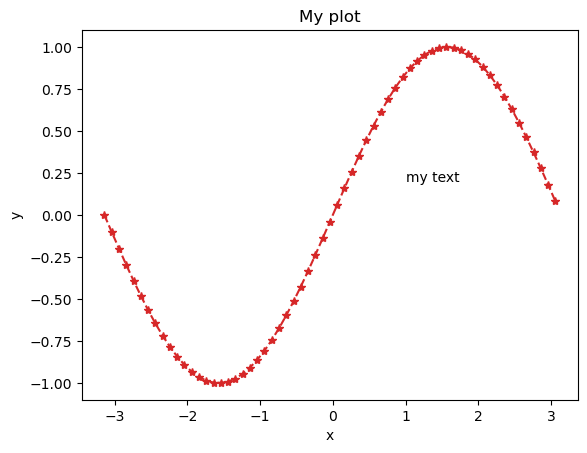

In [15]:
fig, ax = plt.subplots()

ax.plot(x,y, color='tab:red', marker='*', linestyle='--'
        )

# default named colors
# https://matplotlib.org/stable/gallery/color/named_colors.html

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("My plot")
ax.annotate("my text", (1,.2))

In [16]:
plt.style.use("ggplot")

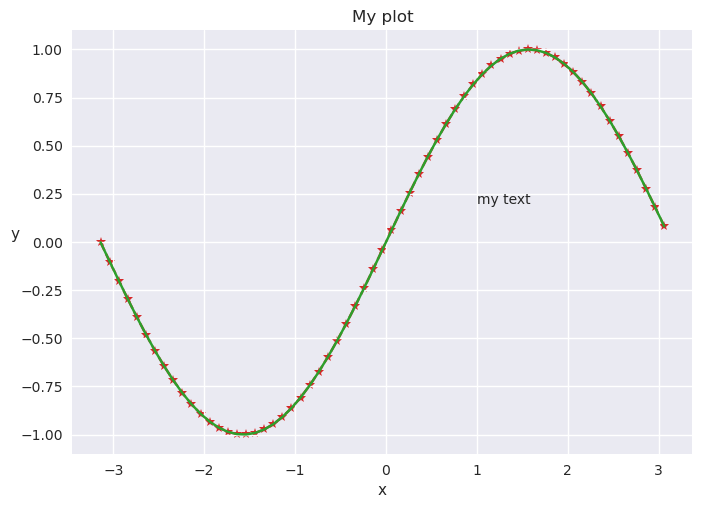

In [32]:
with plt.style.context('seaborn'):

    fig, ax = plt.subplots()

    
    ax.plot(x,y, color='tab:green')
    
    ax.plot(x,y, color='tab:red', marker='*', linestyle='--', zorder=0)


    # default named colors
    # https://matplotlib.org/stable/gallery/color/named_colors.html

    ax.set_xlabel("x")
    ax.set_ylabel("y", rotation=0)
    ax.set_title("My plot")
    ax.annotate("my text", (1,.2))
#     ax.tick_params(rotation=90, axis='y')

## Creating Multiple plots on one figure

- In matplotlib you create a figure and axis *object* that you then modify.
- This is where `set_title`, `set_xlabel`, `set_xlim` comes in
- In order to create more axis objects within a figure, you need to tell matplotlib that's what you want

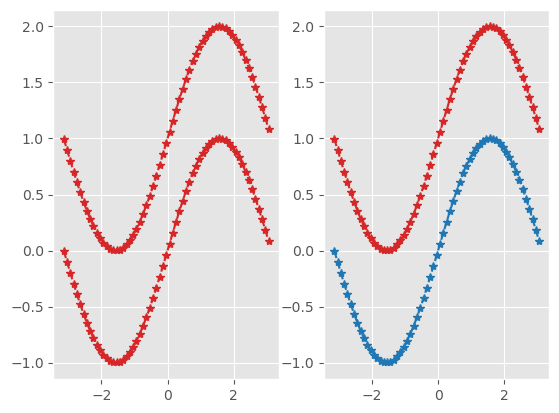

In [36]:
fig, ax = plt.subplots(1,2)

ax[0].plot(x,y, color='tab:red', marker='*', linestyle='--')
ax[1].plot(x,y, color='tab:blue', marker='*', linestyle='--')

# or in a loop
for a in ax:
    a.plot(x,y+1, color='tab:red', marker='*', linestyle='--')

Text(0.5, 0.98, 'My Big Figure')

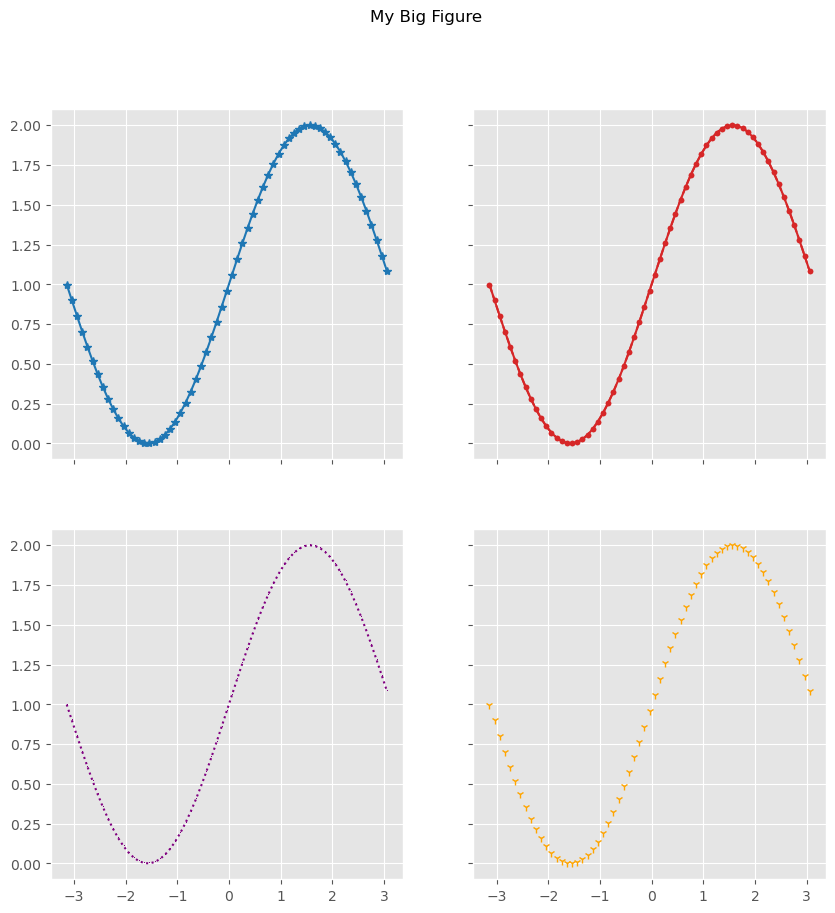

In [50]:
# Creating a grid, just creates an axis object of that size

# change the figure size
# allow sharing x and y axes
fig, ax = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)

# ax is a now a numpy array
ax[0,0]

#  if you use the same loop, you'll get an error
# for a in ax:
#     print(a)
#     # try:
#     a.plot(x,y+1, color='tab:red', marker='.', linestyle='-')
#     # except AttributeError:
#     #     print("Attribute Error")
    
# # instead index like a 2-D array
ax[0,1].plot(x,y+1, color='tab:red', marker='.', linestyle='-')

# ax.flatten().shape

# to use a loop, use numpy's flatten
for a,l,m,c in zip(ax.flatten(), ['-', '--', ':', ' '], ['*', '.', ',', '1' ], ['tab:blue', 'tab:red', 'purple', 'orange']):
    a.plot(x,y+1, color=c, marker=m, linestyle=l)

fig.suptitle("My Big Figure")

- Matplotlib has basically any kind of visualization you want, and you can do anything with it, but `seaborn` makes things a lot easier, so we'll stop here for now.

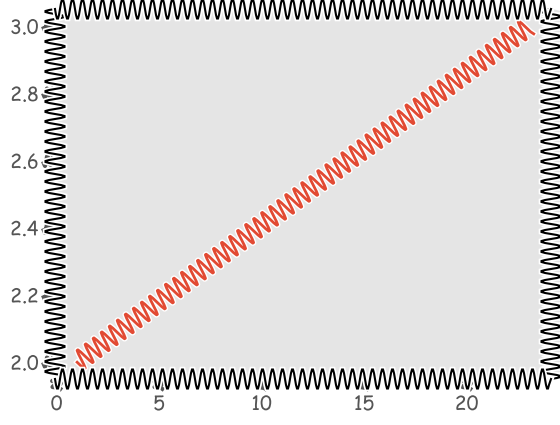

In [61]:
with plt.xkcd(randomness=1, length=10, scale=1):
    plt.plot([1,23], [2,3])

## Plotting Pandas DataFrame

- Dataframes are just like any other data source for matplotlib, so you can do the above method. 
- But pandas has a great plotting function too, which makes visualizing data a lot more easy
- For that, we can use `plot()` and specifying `kind` or we can use the `plot` accessor

In [6]:
# create a household-year panel
multi_index = pd.MultiIndex.from_product([range(10), range(2002, 2020)], names = ['hhid', 'year'])

hh_panel = pd.DataFrame(index=multi_index, columns = ['income', 'poverty', 'consumption'], 
             data = np.array([np.random.uniform(0,100,size=180), np.random.choice([0,1], size=180), np.random.normal(size=180)]).T).reset_index()

In [63]:
hh_panel

,hhid,year,income,poverty,consumption
0,0,2002,83.933785,0.0,-0.341747
1,0,2003,5.076434,0.0,0.442250
2,0,2004,18.480076,1.0,-1.205849
3,0,2005,82.584559,1.0,-0.029012
4,0,2006,88.732618,0.0,0.090413
...,...,...,...,...,...
175,9,2015,79.267580,1.0,-0.723366
176,9,2016,32.520875,0.0,-0.543620
177,9,2017,20.125116,1.0,-0.250988
178,9,2018,51.402319,1.0,-0.295578


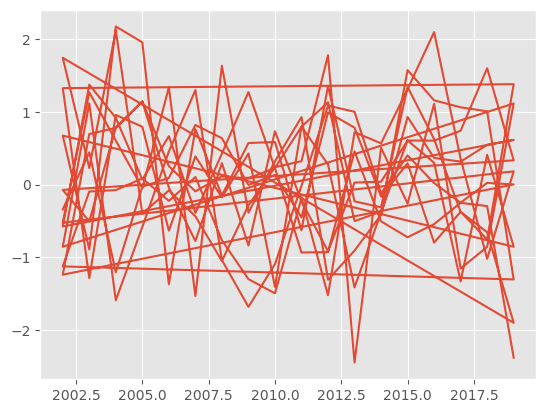

In [64]:
fig, ax = plt.subplots()

ax.plot(hh_panel['year'], hh_panel['consumption'])

<AxesSubplot:title={'center':'My figure'}, xlabel='year', ylabel='income'>

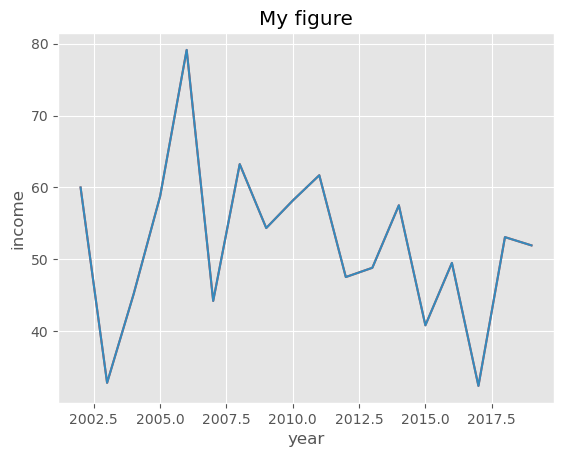

In [70]:
hh_panel.groupby('year').mean()['income'].plot(kind='line', ylabel='income', title='My figure')
hh_panel.groupby('year').mean()['income'].plot.line()


year
2002    AxesSubplot(0.125,0.11;0.775x0.77)
2003    AxesSubplot(0.125,0.11;0.775x0.77)
2004    AxesSubplot(0.125,0.11;0.775x0.77)
2005    AxesSubplot(0.125,0.11;0.775x0.77)
2006    AxesSubplot(0.125,0.11;0.775x0.77)
2007    AxesSubplot(0.125,0.11;0.775x0.77)
2008    AxesSubplot(0.125,0.11;0.775x0.77)
2009    AxesSubplot(0.125,0.11;0.775x0.77)
2010    AxesSubplot(0.125,0.11;0.775x0.77)
2011    AxesSubplot(0.125,0.11;0.775x0.77)
2012    AxesSubplot(0.125,0.11;0.775x0.77)
2013    AxesSubplot(0.125,0.11;0.775x0.77)
2014    AxesSubplot(0.125,0.11;0.775x0.77)
2015    AxesSubplot(0.125,0.11;0.775x0.77)
2016    AxesSubplot(0.125,0.11;0.775x0.77)
2017    AxesSubplot(0.125,0.11;0.775x0.77)
2018    AxesSubplot(0.125,0.11;0.775x0.77)
2019    AxesSubplot(0.125,0.11;0.775x0.77)
Name: income, dtype: object

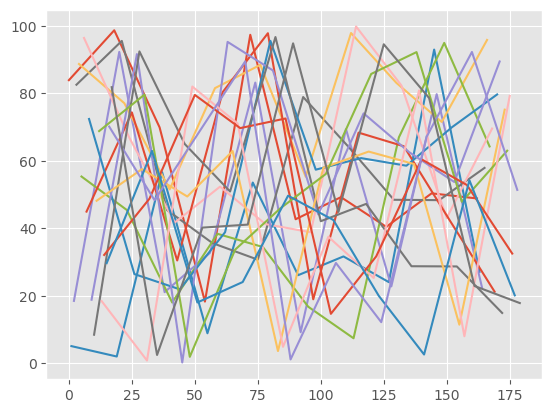

In [71]:
hh_panel.groupby('year')['income'].plot.line()

<AxesSubplot:xlabel='income', ylabel='consumption'>

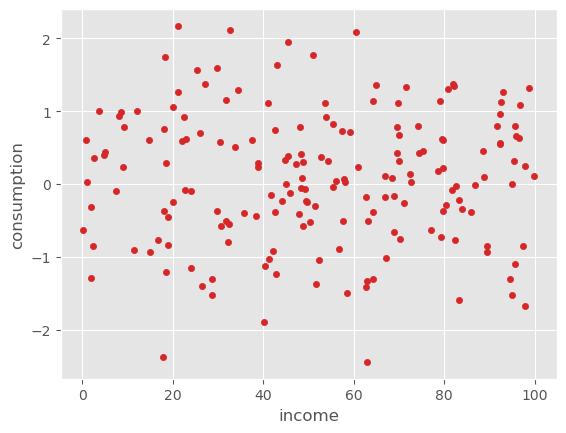

In [73]:
hh_panel.plot.scatter(x='income', y='consumption', color='tab:red')
# all the properties that we had in matplotlib apply here as well because pandas *builds* on matplotlib for its plotting API

<AxesSubplot:>

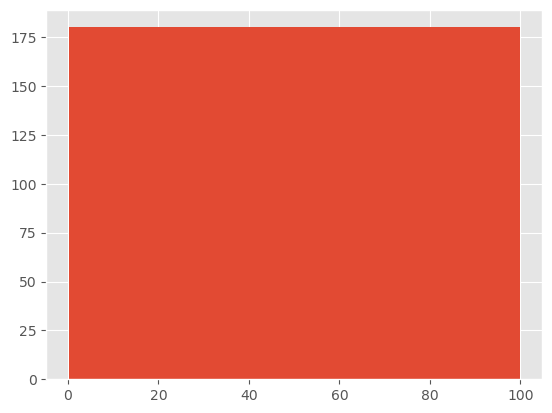

In [79]:
hh_panel['income'].hist(bins=1)


- To do multiple plots, we create our figure objects and refer to them in the plot call 

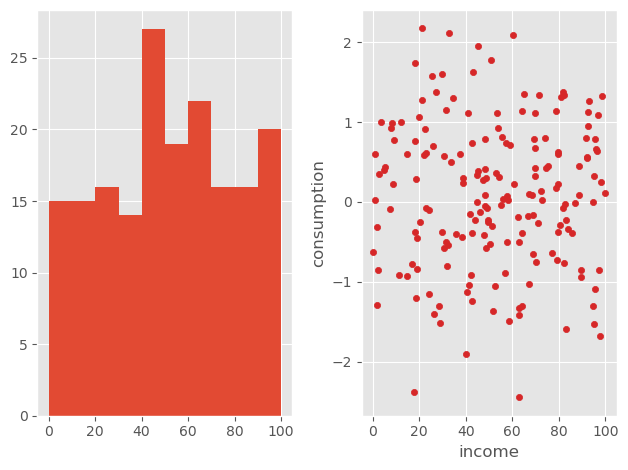

In [82]:
fig, ax  = plt.subplots(1,2)

hh_panel['income'].hist(ax=ax[0])

hh_panel.plot.scatter(x='income', y='consumption', color='tab:red', ax=ax[1])

# # To get rid of overlap issues, call tight_layout

plt.tight_layout()


- Pandas has all the greatest hits of visualization and the formatting and plotting is all the same:

```
pandas.DataFrame.plot
pandas.DataFrame.plot.area
pandas.DataFrame.plot.bar
pandas.DataFrame.plot.barh
pandas.DataFrame.plot.box
pandas.DataFrame.plot.density
pandas.DataFrame.plot.hexbin
pandas.DataFrame.plot.hist
pandas.DataFrame.plot.kde
pandas.DataFrame.plot.line
pandas.DataFrame.plot.pie
pandas.DataFrame.plot.scatter
```

<AxesSubplot:ylabel='Density'>

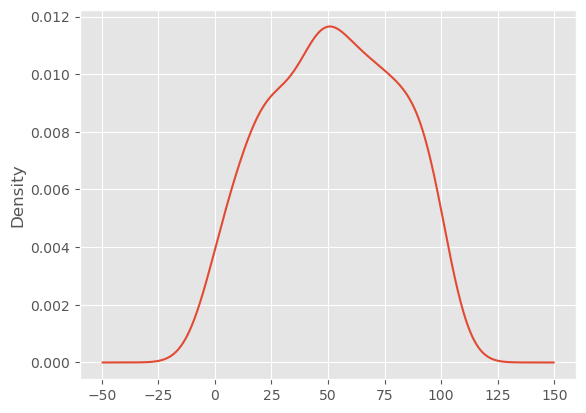

In [89]:
hh_panel['income'].plot.kde()

## Fancy Plotting with Seaborn

- If we want to make our life easier and make nice looking graphs, we can also use `seaborn`
- https://seaborn.pydata.org/
- You can look at the gallery of all the graphs that you can make.
- `seaborn` builds on `matplotlib` but just makes things easier, and visually nicer
- `seaborn` works with data that is `tidy` and long
- This means that there is no "wide parts"
    - So no "income_2000", "income_2001", etc.. 

<AxesSubplot:xlabel='income', ylabel='consumption'>

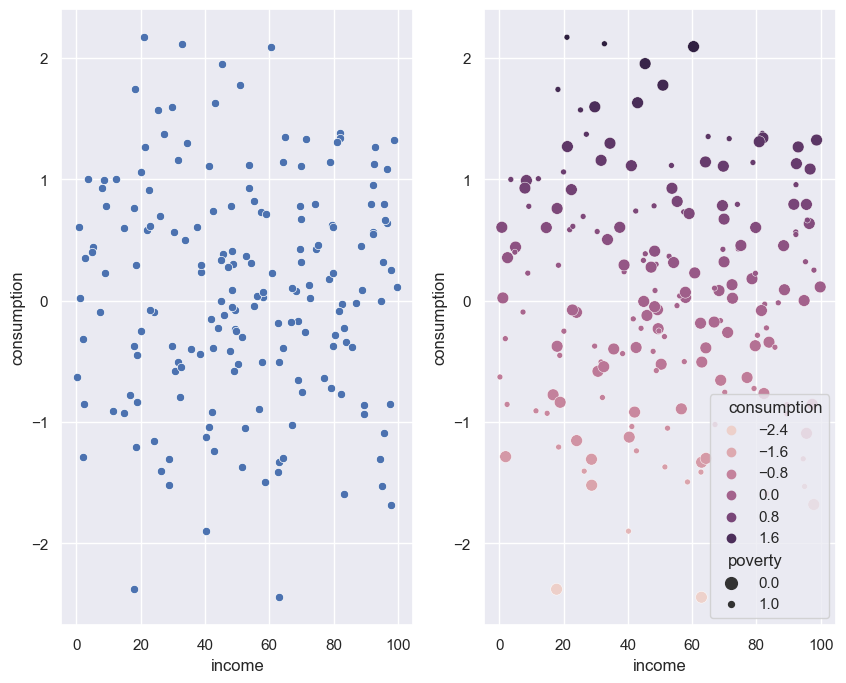

In [93]:
sns.set_theme()

fig, ax = plt.subplots(1,2, figsize=(10,8))

sns.scatterplot(x='income', y= 'consumption', data=hh_panel, ax=ax[0])

# but you can also change colors or size or style based on other variables
sns.scatterplot(x='income', y= 'consumption', data=hh_panel, ax=ax[1], hue='consumption', size='poverty')


### Heatmaps

- This is particularly great for correlations
- First we create a correlation matrix with `pandas.DataFrame.corr`

In [95]:
hh_panel[['income', 'poverty', 'consumption']].corr()

,income,poverty,consumption
income,1.000000,-0.073369,-0.003768
poverty,-0.073369,1.000000,-0.059729
consumption,-0.003768,-0.059729,1.000000


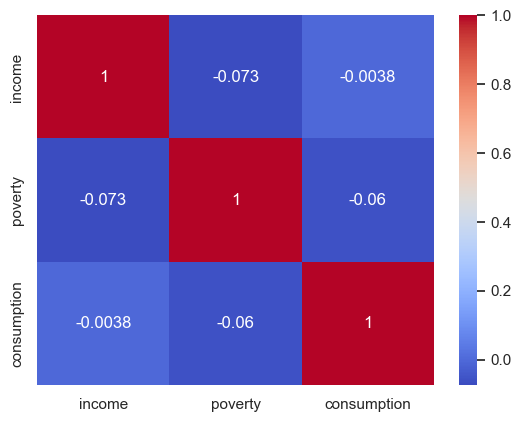

In [103]:
sns.heatmap(hh_panel[['income', 'poverty', 'consumption']].corr(), 
            cmap='coolwarm', annot=True, #vmin=0, vmax=1
            )

plt.savefig("my_figure.pdf", dpi=300)

- We can show a lot of information using `pairplot` 

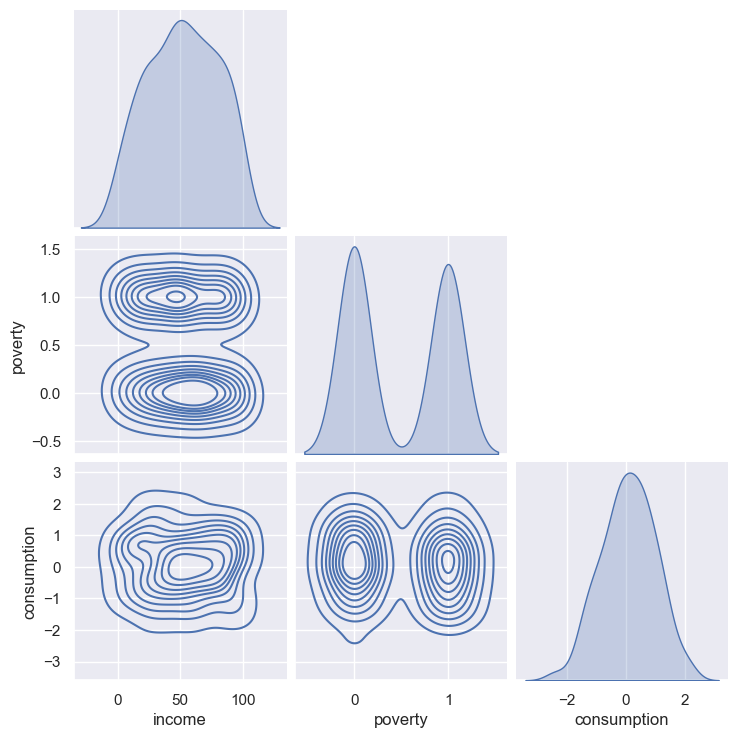

In [106]:
sns.pairplot(hh_panel[['income', 'poverty', 'consumption']], 
             corner=True, kind='kde'
             )

## Regplot

- We can also visualize scatters with a regression or quadratic or spline
- Using the hue, color and style parameters, we can add interesting information


In [108]:
tips = sns.load_dataset("tips")

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


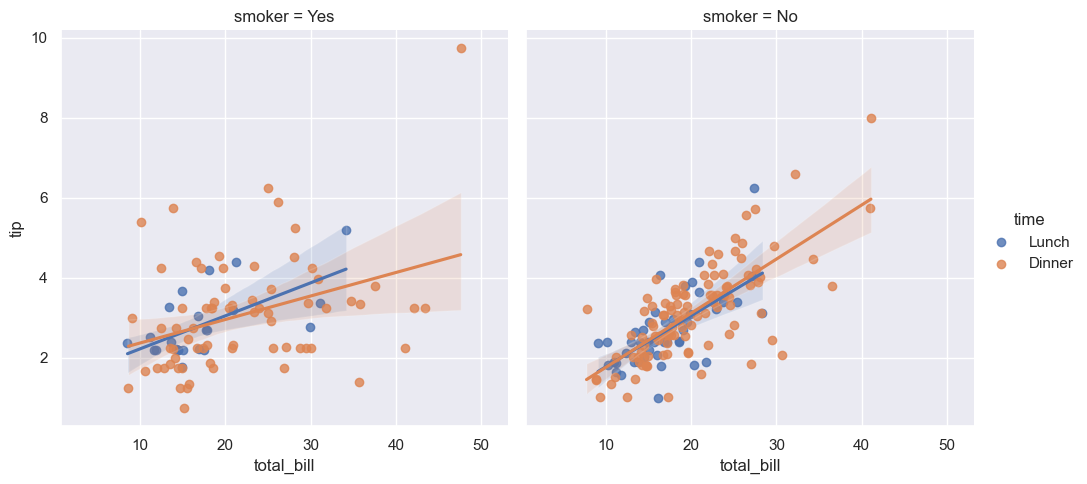

In [112]:
sns.lmplot(x='total_bill', y = 'tip', data=tips, 
           hue='time', 
           col='smoker', 
           x_partial='size', y_partial='size'
           )

## Plotly

- `Plotly` is a bit of a different API, but it allows really easy interactivity in your plots
- `Plotly` gets pretty complicated because it's using web tools underneath, but can be really useful in constructing dashboards
- We will be using `plotly_express` to make some nice interactive graphs
- But similarly to `seaborn`, it also works best with tidy data

In [113]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [114]:
px.scatter(tips, x='total_bill', y = 'tip', color='time', symbol='smoker'
        )

- Plotly is a little advanced, but it is very powerful. 
- You can even create easy animations with it (albeit mileage may vary)

In [14]:
px.scatter(hh_panel, x="income", y="consumption", animation_frame="year", animation_group="hhid",
           size="poverty", hover_name="hhid", color='poverty')

In [10]:
px.bar(hh_panel, x="hhid", y="consumption", animation_frame="year", 
    #    animation_group="hhid",
            hover_name="hhid", color='hhid', )

In [16]:
pop_data = px.data.gapminder()
px.scatter(pop_data, x="gdpPercap", y="lifeExp", animation_frame="year", 
           animation_group="country",
           size="pop", color="continent", 
           hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [7]:
pop_data = px.data.gapminder()
px.bar(pop_data, x="continent", y="pop", color="continent",
  animation_frame="year", 
  # animation_group="country", 
  range_y=[0,4000000000])

## Easy Interactivity with Jupyter and `ipywidgets`

- Plotly makes interactivity really easy and cool
- But for certain things, it may require a lot of work or not what you want
- So we can use `ipywidgets`
- These widgets are really great for creating fast interactivity so you can more easily do data exploration
- Create a big dashboard of different visualizations that you can use for your needs
- This is great for own exploration or for showing something to collaborators.
- All you have to do is create a function and put a *decorator* above it.

In [118]:
def visualize_and_regress(df, x,y, hue=None):
    sns.lmplot(x=x,y=y,data=df, hue=hue)

- we can just run this function and it'll be fine:

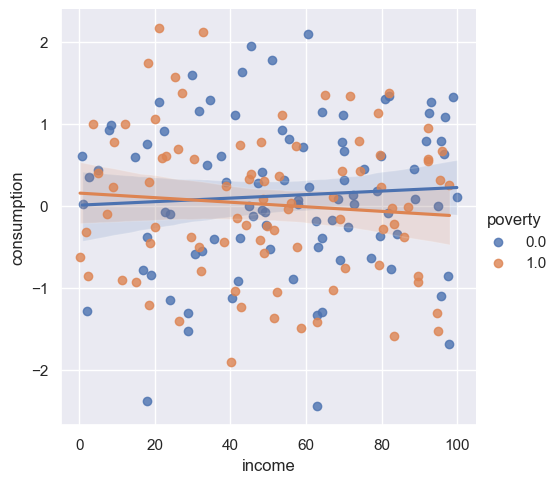

In [119]:
visualize_and_regress(hh_panel, 'income', 'consumption', hue='poverty')

- but if we specify a bit more and with a small change, we can unleash!

In [120]:
hh_panel.groupby('year')[['income', 'consumption']].describe()

income                                                                    \
      count       mean        std        min        25%        50%        75%   
year                                                                            
2002   10.0  59.991191  26.510330  18.272172  44.238137  49.815081  80.438320   
2003   10.0  32.814506  28.029706   1.992981  12.678205  26.606784  48.101477   
2004   10.0  45.150774  32.003293   9.204728  21.420910  27.755275  77.202738   
2005   10.0  58.774966  21.277661  30.712891  46.133299  53.198202  75.244360   
2006   10.0  79.122134  15.721587  51.548227  72.938010  82.359085  88.669444   
2007   10.0  44.207904  26.978333   7.402653  22.120379  41.908215  62.055945   
2008   10.0  63.236130  23.407536  38.834325  42.040761  59.613865  79.169967   
2009   10.0  54.346449  26.695045  18.953584  33.499509  54.643745  72.880887   
2010   10.0  58.168669  23.354468  21.920838  43.490433  59.697483  71.808231   
2011   10.0  61.690637  32.611356   0.224897  46.529165  68.368586  88.812007   
2012   10.0  47.531296  29.967941   8.455942  28.718534  44.685815  61.478521   
2013   10.0  48.816390  23.085554   3.614169  48.489210  57.774966  61.842257   
2014   10.0  57.510359  26.964556   1.898719  46.443002  59.572490  76.947050   
2015   10.0  40.818356  34.031620   0.812813  10.606645  31.394514  77.218029   
2016   10.0  49.495259  21.342292  14.648508  32.211772  50.829931  67.405409   
2017   10.0  32.385697  19.114827   2.585397  20.036461  26.880536  47.874376   
2018   10.0  53.082184  30.817146   1.130513  34.387918  59.271876  69.854938   
2019   10.0  51.932375  33.379440   2.448703  27.236958  42.987399  81.056371   

                consumption                                                    \
            max       count      mean       std       min       25%       50%   
year                                                                            
2002  98.727874        10.0 -0.099171  1.021525 -1.237528 -0.784419 -0.432520   
2003  93.011680        10.0  0.234121  0.920276 -1.285086 -0.402470  0.334801   
2004  92.325405        10.0  0.545464  1.226863 -1.589449  0.093690  0.780945   
2005  95.575250        10.0  0.412621  0.807030 -0.581662 -0.044307  0.076939   
2006  97.915725        10.0  0.044761  0.731750 -1.370050 -0.188452  0.024965   
2007  94.992891        10.0  0.014236  0.842147 -1.530600 -0.424086  0.005008   
2008  99.857848        10.0 -0.007781  0.827444 -1.050220 -0.617474 -0.018155   
2009  97.858987        10.0 -0.214008  0.888797 -1.679517 -0.724050 -0.145172   
2010  95.602648        10.0 -0.152779  0.838165 -1.493686 -0.786595  0.227512   
2011  95.287052        10.0  0.039474  0.646636 -0.933032 -0.394766 -0.101312   
2012  96.726375        10.0  0.193914  1.240271 -1.520538 -0.925280  0.633786   
2013  75.194031        10.0 -0.251400  1.095289 -2.443780 -0.806124 -0.101738   
2014  92.261173        10.0 -0.116517  0.379290 -0.505471 -0.380311 -0.238493   
2015  82.047130        10.0  0.607134  0.725312 -0.723366  0.319467  0.605182   
2016  79.561851        10.0  0.493253  0.845256 -0.797493  0.090393  0.484494   
2017  62.965919        10.0 -0.126261  0.763324 -1.330875 -0.375023 -0.249754   
2018  92.297703        10.0 -0.000166  0.874963 -1.020490 -0.729701 -0.136351   
2019  94.855309        10.0 -0.281473  1.271613 -2.377751 -1.190851  0.091241   

                          
           75%       max  
year                      
2002  0.486144  1.741212  
2003  1.009596  1.371984  
2004  0.946080  2.171297  
2005  1.052775  1.953776  
2006  0.403287  1.335634  
2007  0.666846  1.297695  
2008  0.391204  1.631756  
2009  0.341297  1.270380  
2010  0.300114  0.731834  
2011  0.675983  0.926568  
2012  1.118224  1.776613  
2013  0.652688  0.999296  
2014 -0.000617  0.566613  
2015  1.214967  1.572217  
2016  0.987682  2.094342  
2017  0.344707  1.061213  
2018  0.511477  1.597826  
2019  0.542794  1.378578

In [121]:
@interact(
    df = fixed(hh_panel),
    x = hh_panel.columns,
    y =hh_panel.columns,
    hue=hh_panel.columns.tolist() + [None]
)
def visualize_and_regress(df, x,y, hue=None):
    sns.lmplot(x=x,y=y,data=df, hue=hue)
    if hue is not None:
        print(df.groupby(hue)[[x,y]].describe())
    else:
        print(df[[x,y]].describe())

interactive(children=(Dropdown(description='x', options=('hhid', 'year', 'income', 'poverty', 'consumption'), …

-  If you want to run something that takes time or if you want to make more than one change, you can use `interact_manual`

In [122]:
@interact_manual(
    df = fixed(hh_panel),
    x = hh_panel.columns,
    y =hh_panel.columns,
    hue=hh_panel.columns.tolist() + [None]
)
def visualize_and_regress(df, x,y, hue=None):
    sns.lmplot(x=x,y=y,data=df, hue=hue)
    if hue is not None:
        print(df.groupby(hue)[[x,y]].describe())
    else:
        print(df[[x,y]].describe())

interactive(children=(Dropdown(description='x', options=('hhid', 'year', 'income', 'poverty', 'consumption'), …

## Going to the next level with ydata_profiling

- If you're super lazy, you can just have ydata output a data report for you with everything you need

In [123]:
ProfileReport(hh_panel)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Exercises

Check the docs here: https://seaborn.pydata.org/index.html

1. Use `hh_panel` to create a boxplot of income with seaborn

2. Create a jointplot with a regression on consumption and income



## Recap

- We learned about matplotlib, seaborn, pandas plotting, plotly for visualization
- ipywidgets can be helpful if we want to explore some data
- Things can be made even easier with profiling tools
- This is a really a drop in the bucket in terms of visualization. 
- This is just to get you started.
- The important thing is that your visualizations should give needed information, but not too much...
- When making graphs, make sure to label axes and make a title that makes sense
- A cursory glance should be enough to get an idea of what you're trying to tell with the visualization
